In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
merged_df = pd.read_csv("/content/drive/MyDrive/ML PROJECT/Bus_Service_Predictions/Data Preprocessing/merged_bus_data.csv")
merged_df

,Date,Time_Slot,From_Location,To_Location,Passenger_Count,Day_Type,Distance_km,Ticket_Price,Discount_Offered (%),Special_Event,Total_Revenue,High_Demand,Weekday,Time_Slot_Encoded,Day_Type_Encoded,Special_Event_Encoded
0,2024-01-01,Evening,Visakhapatnam,Secunderabad,233,Weekday,610.32,732,5,No Event,162028.20,0,Monday,1,0,2
1,2024-01-01,Evening,Nizamabad,Guntur,195,Weekday,441.78,530,0,No Event,103350.00,0,Monday,1,0,2
2,2024-01-02,Night,Hyderabad,Kurnool,136,Weekday,213.32,256,3,No Event,33771.52,0,Tuesday,3,0,2
3,2024-01-02,Morning,Guntur,Rajahmundry,241,Weekday,195.41,234,1,No Event,55830.06,0,Tuesday,2,0,2
4,2024-01-02,Afternoon,Tirupati,Secunderabad,184,Weekday,559.94,672,2,No Event,121175.04,0,Tuesday,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2025-05-30,Morning,Tenali,Vijayawada,240,Weekday,33.07,40,0,No Event,9600.00,0,Friday,2,0,2
1996,2025-05-30,Evening,Nizamabad,Kurnool,270,Weekday,385.09,462,2,No Event,122245.20,1,Friday,1,0,2
1997,2025-05-31,Evening,Mahbubnagar,Rajahmundry,215,Weekend,495.83,595,10,Weekend,115132.50,0,Saturday,1,1,3
1998,2025-05-31,Morning,Rajahmundry,Vijayawada,234,Weekend,158.45,190,10,Weekend,40014.00,0,Saturday,2,1,3


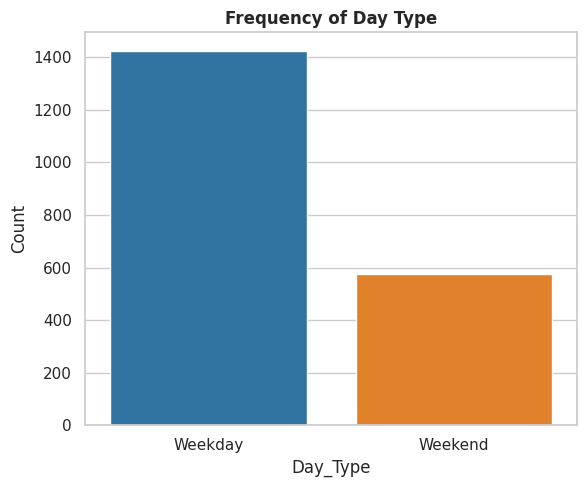

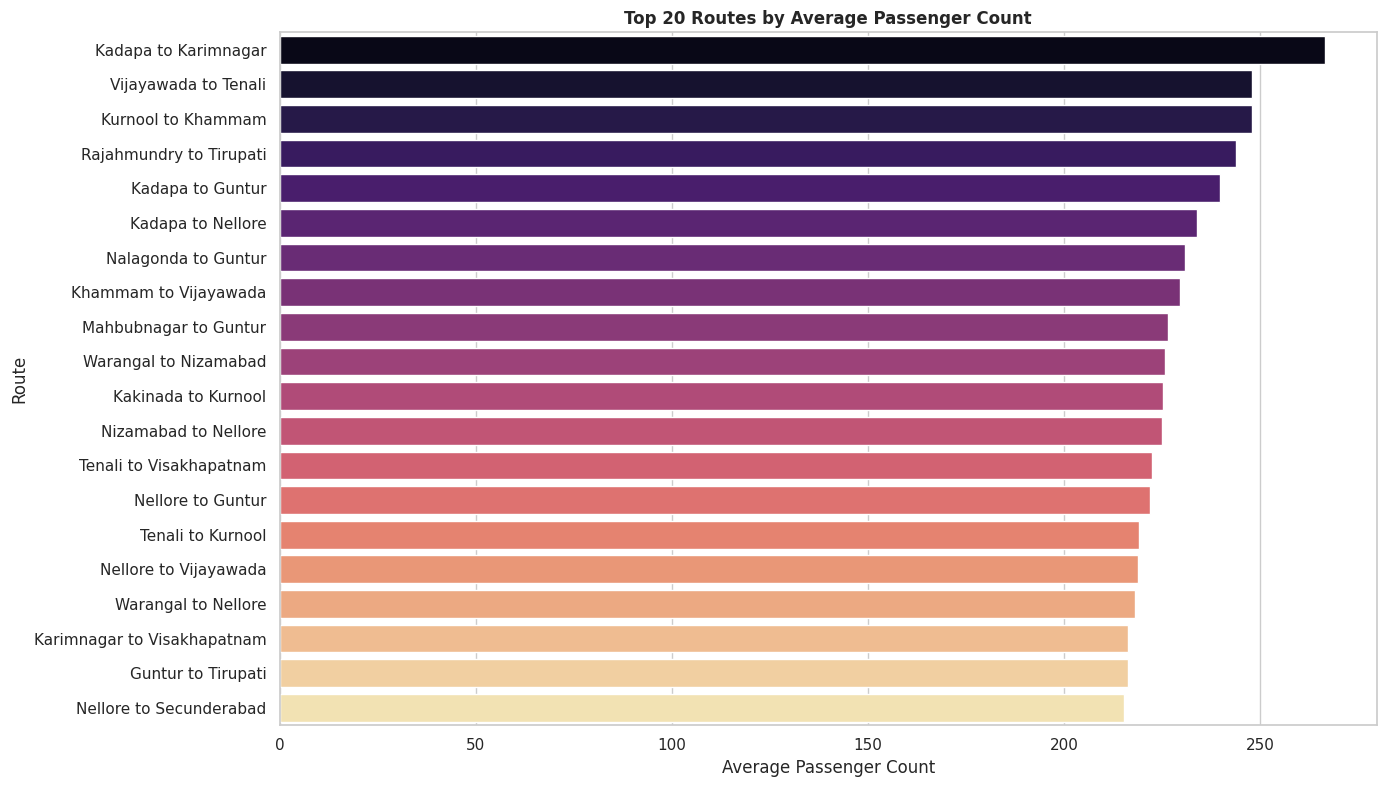

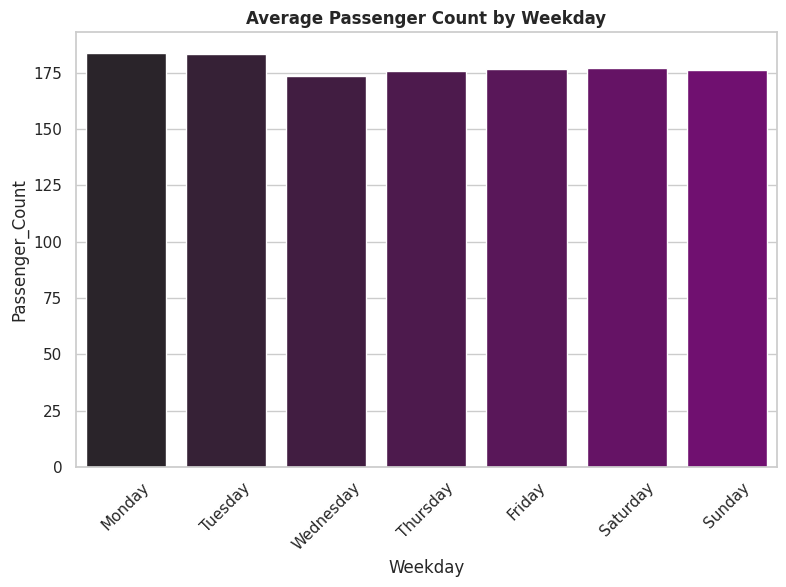

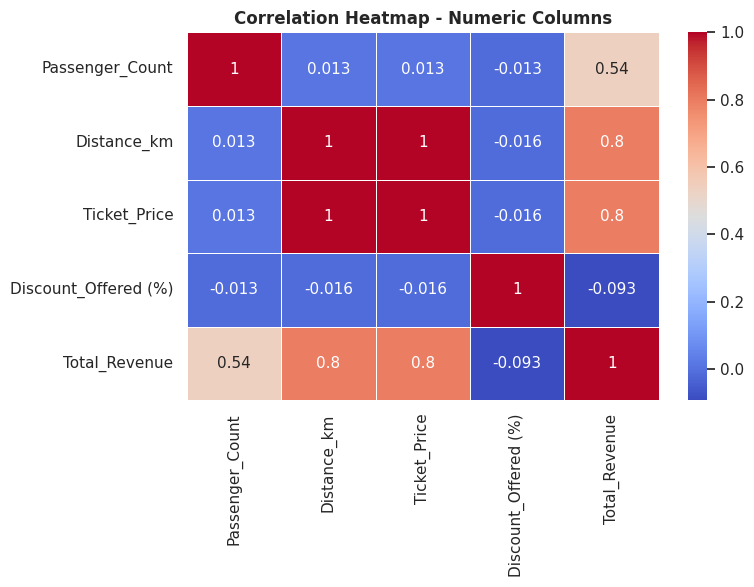

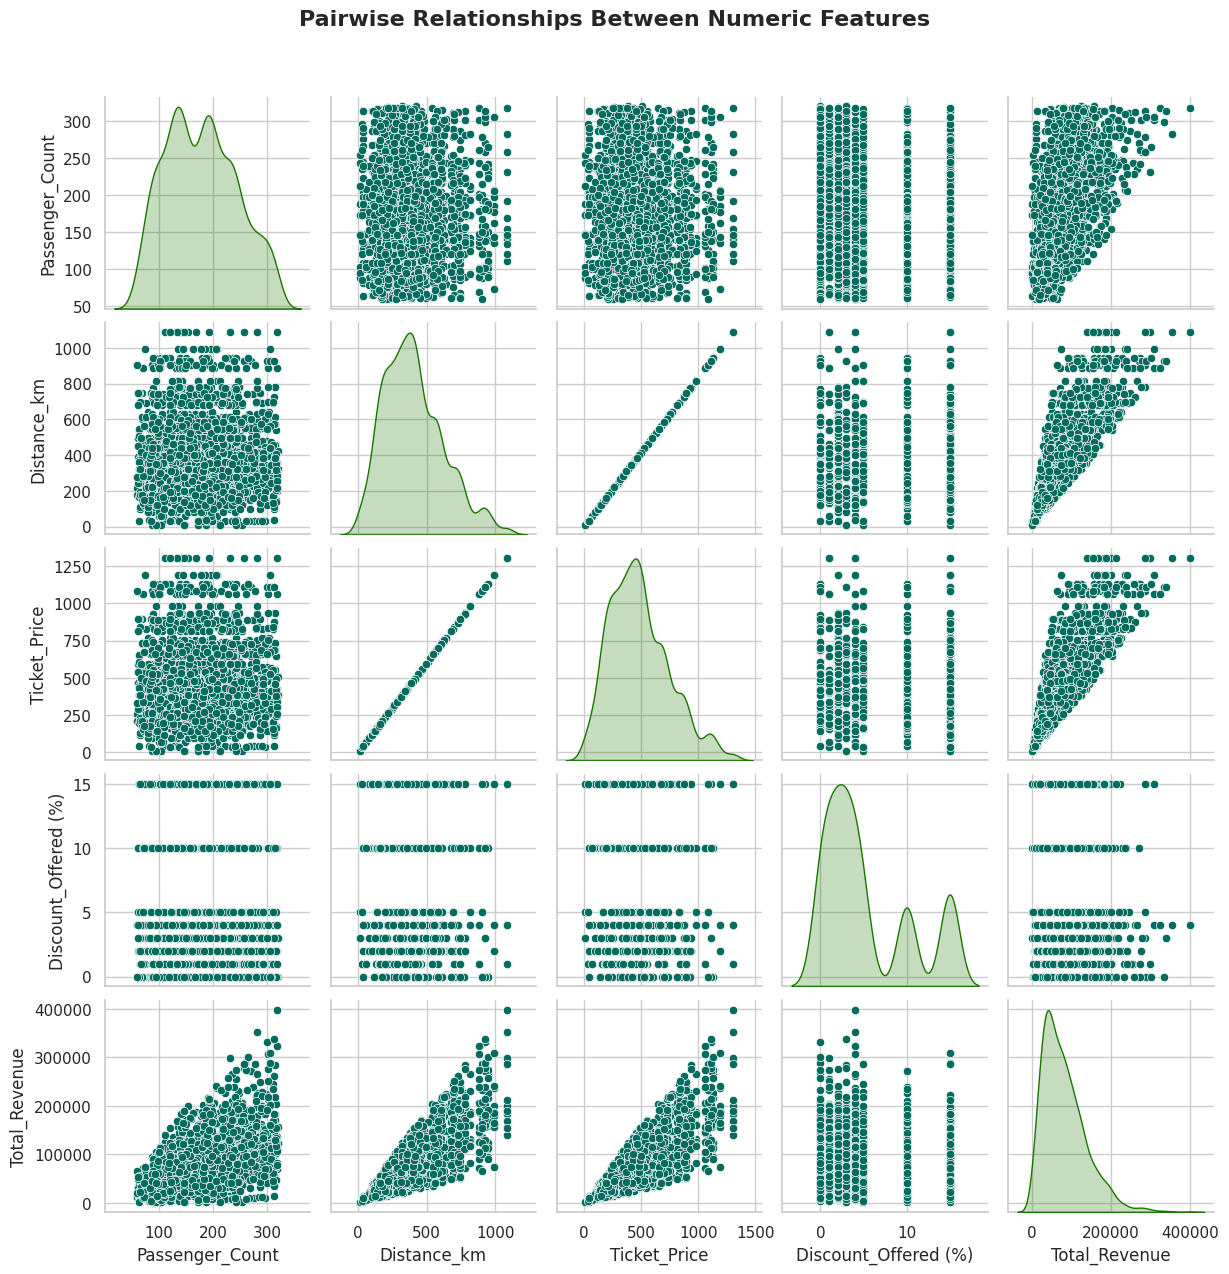

In [ ]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.colors as mcolors
import re
import os


# Load Dataset

merged_df = pd.read_csv("/content/drive/MyDrive/ML PROJECT/Bus_Service_Predictions/Data Preprocessing/merged_bus_data.csv", parse_dates=['Date'])


# Set Plot Styles

sns.set(style="whitegrid")
plt.rcParams['font.size'] = 11

# Ensure weekdays appear in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['Weekday'] = pd.Categorical(merged_df['Weekday'], categories=weekday_order, ordered=True)

# Define numeric columns
numeric_cols = ['Passenger_Count', 'Distance_km', 'Ticket_Price', 'Discount_Offered (%)', 'Total_Revenue']

# Folder to save visualizations
save_dir = "/content/drive/MyDrive/ML PROJECT/Bus_Service_Predictions/EDA & Data Visualisation/Visuals"
os.makedirs(save_dir, exist_ok=True)

# Clean string to create filename
def clean_filename(s):
    s = s.lower()
    s = re.sub(r'\s+', '_', s)
    s = re.sub(r'[^\w_]', '', s)
    return s

# Heading display
def display_heading(text, level=2):
    html = f"<h{level} style='font-weight:bold; font-size:{20 + (3-level)*4}px; color:#333;'>{text}</h{level}>"
    display(HTML(html))



# Exploratory Data Analysis - EDA

display_heading("Exploratory Data Analysis - EDA and Visualisation", level=1)


# 1. UNIVARIATE ANALYSIS
display_heading("1. Univariate Analysis", level=2)

n_colors = merged_df['Day_Type'].nunique()
palette = sns.color_palette("tab10", n_colors=n_colors)

plt.figure(figsize=(6, 5))
sns.countplot(data=merged_df, x='Day_Type', hue='Day_Type', palette=palette, legend=False)
plt.title('Frequency of Day Type', fontweight='bold')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "day_type_frequency.png"), dpi=300)
plt.show()





# 2. BIVARIATE ANALYSIS

display_heading("2. Bivariate Analysis", level=2)

# Route-wise average passenger count
merged_df['Route'] = merged_df['From_Location'] + ' to ' + merged_df['To_Location']
route_avg = merged_df.groupby('Route')['Passenger_Count'].mean().sort_values(ascending=False)
top_20_routes = route_avg.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_routes.reset_index(), x='Passenger_Count', y='Route',
            hue='Route', dodge=False, palette='magma', legend=False)
plt.title('Top 20 Routes by Average Passenger Count', fontweight='bold')
plt.xlabel('Average Passenger Count')
plt.ylabel('Route')
plt.tight_layout()

title = plt.gca().get_title()
filename = clean_filename(title) + ".png"
full_path = os.path.join(save_dir, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')
plt.show()

# 3. TIME SERIES ANALYSIS

display_heading("3. Time Series Analysis", level=2)

plt.figure(figsize=(8, 6))
sns.barplot(data=merged_df, x='Weekday', y='Passenger_Count', estimator='mean',
            errorbar=None, order=weekday_order,
            hue='Weekday', palette=sns.dark_palette("purple", n_colors=len(weekday_order)),
            legend=False)
plt.title('Average Passenger Count by Weekday', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

title = plt.gca().get_title()
filename = clean_filename(title) + ".png"
full_path = os.path.join(save_dir, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')
plt.show()


# 4. CORRELATION ANALYSIS

display_heading("4. Correlation Analysis", level=2)

plt.figure(figsize=(8, 6))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Numeric Columns', fontweight='bold')
plt.tight_layout()

title = plt.gca().get_title()
filename = clean_filename(title) + ".png"
full_path = os.path.join(save_dir, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')
plt.show()


# 5. PAIRWISE RELATIONSHIPS

display_heading("5. Pairwise Relationships", level=2)

pair_plot = sns.pairplot(merged_df[numeric_cols],
                         diag_kind='kde',
                         plot_kws={'color': '#016B5E'},
                         diag_kws={'color': '#197600'})

plot_title = 'Pairwise Relationships Between Numeric Features'
pair_plot.fig.suptitle(plot_title, fontweight='bold', fontsize=16, y=1.02)
pair_plot.fig.subplots_adjust(top=0.95)

filename = clean_filename(plot_title) + ".png"
full_path = os.path.join(save_dir, filename)
pair_plot.fig.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()

